In [191]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import f1_score

num_genes = 54

## 1,281 genes (core iCD signature) that were differentially expressed (fold change ≥ 1.5) between 2 independent iCD and Ctl groups.

In [192]:
core = pd.read_csv('data/core_icd.csv')
core.rename(columns={'Gene ID':'Gene_ID'}, inplace=True)
# core = core[core['Gene_ID'].apply(lambda x: str(x).isdigit())]
# core = core[core.Gene_ID.astype(int).isin(dataset.Gene_ID.astype(int))]
# core = core[core['Gene_ID'].apply(lambda x: isinstance(x, int))]
core

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
...,...,...,...,...,...,...
1276,338094,FAM151A,-9.422,-3.236,-8.349,-3.062
1277,8029,CUBN,-9.435,-3.238,-6.882,-2.783
1278,64902,AGXT2,-10.177,-3.347,-6.692,-2.742
1279,9027,NAT8,-10.575,-3.403,-6.818,-2.769


In [193]:
core = core.sort_values(["Log FC (iCD-1 vs Ctl)"], ascending=False)
core.head(60)


,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
5,5225,PGC,15.305,3.936,11.905,3.574
6,7130,TNFAIP6,14.449,3.853,11.673,3.545
7,6374,CXCL5,14.101,3.818,13.939,3.801
8,1116,CHI3L1,13.731,3.779,8.139,3.025
9,5008,OSM,13.279,3.731,16.396,4.035


In [194]:
icd1 = pd.concat([core.head(num_genes), core.tail(num_genes)])

icd1

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
...,...,...,...,...,...,...
1276,338094,FAM151A,-9.422,-3.236,-8.349,-3.062
1277,8029,CUBN,-9.435,-3.238,-6.882,-2.783
1278,64902,AGXT2,-10.177,-3.347,-6.692,-2.742
1279,9027,NAT8,-10.575,-3.403,-6.818,-2.769


In [195]:
core = core.sort_values(["Log FC (iCD-2 vs Ctl )"], ascending=False)
core

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
2,366,AQP9,21.243,4.409,32.809,5.036
1,4314,MMP3,21.431,4.422,29.681,4.891
3,3576,IL8,18.578,4.216,27.838,4.799
10,3577,CXCR1,12.230,3.612,19.625,4.295
...,...,...,...,...,...,...
1273,1271,CNTFR,-8.546,-3.095,-6.979,-2.803
1266,169693,C9orf71,-6.858,-2.778,-7.636,-2.933
1272,2538,G6PC,-8.011,-3.002,-7.651,-2.936
1275,9153,SLC28A2,-9.219,-3.205,-8.322,-3.057


## 200 most differentially expressed genes between CD1, CD2 and control

In [196]:
icd2 = pd.concat([core.head(num_genes), core.tail(num_genes)])

icd2

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
2,366,AQP9,21.243,4.409,32.809,5.036
1,4314,MMP3,21.431,4.422,29.681,4.891
3,3576,IL8,18.578,4.216,27.838,4.799
10,3577,CXCR1,12.230,3.612,19.625,4.295
...,...,...,...,...,...,...
1273,1271,CNTFR,-8.546,-3.095,-6.979,-2.803
1266,169693,C9orf71,-6.858,-2.778,-7.636,-2.933
1272,2538,G6PC,-8.011,-3.002,-7.651,-2.936
1275,9153,SLC28A2,-9.219,-3.205,-8.322,-3.057


In [197]:
hundred = pd.concat([icd1, icd2])
hundred.shape

(216, 6)

In [198]:
hundred.Gene_ID

0       405753
1         4314
2          366
3         3576
4        50506
         ...  
1273      1271
1266    169693
1272      2538
1275      9153
1276    338094
Name: Gene_ID, Length: 216, dtype: object

In [199]:
hundred.rename(columns={'Gene Symbol':'Gene_Symbol'}, inplace=True)
hundred

,Gene_ID,Gene_Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
...,...,...,...,...,...,...
1273,1271,CNTFR,-8.546,-3.095,-6.979,-2.803
1266,169693,C9orf71,-6.858,-2.778,-7.636,-2.933
1272,2538,G6PC,-8.011,-3.002,-7.651,-2.936
1275,9153,SLC28A2,-9.219,-3.205,-8.322,-3.057


## RISK dataset of control, CD no deep ulcer, CD deep ulcer, UC patients

In [200]:
ds = pd.read_csv('data/risk.csv')
# gene_symbol = dataset.pop("Gene Symbol")
ds.rename(columns={'Gene ID':'Gene_ID', 'Gene Symbol':'Gene_Symbol'}, inplace=True)
# gene_id = dataset.pop("Gene ID")
ds

,Gene_ID,Gene_Symbol,CCFA_Risk_001,CCFA_Risk_002,CCFA_Risk_003,CCFA_Risk_004,CCFA_Risk_005,CCFA_Risk_006,CCFA_Risk_007,CCFA_Risk_008,...,CCFA_Risk_089,CCFA_Risk_090,CCFA_Risk_117,CCFA_Risk_118,CCFA_Risk_121,CCFA_Risk_180,CCFA_Risk_114,CCFA_Risk_139,CCFA_Risk_237,CCFA_Risk_257
0,1,A1BG,-0.53931,1.31210,-0.083781,-0.86227,0.74121,0.72868,0.79123,-0.44062,...,-1.20180,-0.208140,-0.221770,-1.67290,-0.002418,0.569290,0.81253,0.61751,0.150020,0.039876
1,2,A2M,0.79561,1.12940,0.602470,0.81323,0.80724,0.47415,0.38337,0.57451,...,-0.41766,0.233700,0.155220,-0.24888,-0.049269,-0.048866,-0.16492,1.06890,-0.224290,0.232120
2,3,A2MP1,-0.20249,-0.20249,-0.202490,-0.20249,-0.20249,0.10892,-0.20249,-0.20249,...,0.43514,1.932800,2.077500,-0.20249,0.184890,2.437500,-0.20249,1.47860,0.089707,-0.202490
3,9,NAT1,1.02630,-0.65959,1.291500,0.19540,-0.39078,1.09460,-0.21672,0.36204,...,0.16248,0.372190,-0.019795,0.19675,0.392790,0.112410,-0.34924,-0.30852,0.606460,0.173880
4,10,NAT2,0.24641,-7.72410,-0.542870,0.39032,-4.82710,-0.58034,-1.78130,-0.16412,...,0.69774,0.008138,0.013065,0.70364,-0.229340,-0.216230,0.41874,-2.34260,0.000504,-0.296990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,100653021,LOC100653021,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36368,100653022,PP12719,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36369,100653023,LOC100653023,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36370,100653024,LOC100653024,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


In [201]:
# remove genes with low variance
dataset = ds.loc[ds.T[2:].std() >= 0.1]

In [202]:
dataset

,Gene_ID,Gene_Symbol,CCFA_Risk_001,CCFA_Risk_002,CCFA_Risk_003,CCFA_Risk_004,CCFA_Risk_005,CCFA_Risk_006,CCFA_Risk_007,CCFA_Risk_008,...,CCFA_Risk_089,CCFA_Risk_090,CCFA_Risk_117,CCFA_Risk_118,CCFA_Risk_121,CCFA_Risk_180,CCFA_Risk_114,CCFA_Risk_139,CCFA_Risk_237,CCFA_Risk_257
0,1,A1BG,-0.539310,1.31210,-0.083781,-0.86227,0.74121,0.72868,0.79123,-0.44062,...,-1.20180,-0.208140,-0.221770,-1.67290,-0.002418,0.569290,0.81253,0.61751,0.150020,0.039876
1,2,A2M,0.795610,1.12940,0.602470,0.81323,0.80724,0.47415,0.38337,0.57451,...,-0.41766,0.233700,0.155220,-0.24888,-0.049269,-0.048866,-0.16492,1.06890,-0.224290,0.232120
2,3,A2MP1,-0.202490,-0.20249,-0.202490,-0.20249,-0.20249,0.10892,-0.20249,-0.20249,...,0.43514,1.932800,2.077500,-0.20249,0.184890,2.437500,-0.20249,1.47860,0.089707,-0.202490
3,9,NAT1,1.026300,-0.65959,1.291500,0.19540,-0.39078,1.09460,-0.21672,0.36204,...,0.16248,0.372190,-0.019795,0.19675,0.392790,0.112410,-0.34924,-0.30852,0.606460,0.173880
4,10,NAT2,0.246410,-7.72410,-0.542870,0.39032,-4.82710,-0.58034,-1.78130,-0.16412,...,0.69774,0.008138,0.013065,0.70364,-0.229340,-0.216230,0.41874,-2.34260,0.000504,-0.296990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36341,100652994,LOC100652994,0.086807,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36346,100652999,LOC100652999,1.191500,0.00000,0.000000,0.00000,0.00000,0.00000,0.77757,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.641030,0.000000,0.00000,0.45242,0.000000,0.000000
36352,100653005,LOC100653005,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36356,100653010,LOC100653010,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,6.42110,0.00000,0.000000,0.000000


### Match patient IDs with symptoms

In [203]:
full_ids = np.array(dataset.columns)[2:]
len(full_ids)

322

In [204]:
# find order of patients in dataset
patient_ids = np.array([int(i[-3:].lstrip("0"))-1 for i in full_ids])
patient_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  11,  12,  14,  15,
        16,  19,  20,  21,  22,  23,  24,  26,  28,  29,  31,  36,  39,
        42,  44,  45,  46,  47,  48,  49,  50,  51,  52,  55,  56,  57,
        58,  59,  60,  61,  62,  65,  67,  68,  69,  70,  72,  73,  74,
        90,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 119, 131,
       132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 144, 145, 146,
       147, 148, 149, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 230, 235, 251,
       252, 253, 254, 255, 257, 258, 259, 260, 261, 262, 263, 26

In [205]:


with open('sample_titles.txt') as f:
    lines = f.read()

patients = np.array(lines.split("\t"))
num_patients = len(patients)
print(num_patients, "patients")
patients

322 patients


array(['"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_001)"',
       '"CD Male with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_002)"',
       '"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_003)"',
       '"CD Male with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_004)"',
       '"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_005)"',
       '"CD Female with Macroscopic inflammation and Deep Ulcer (CCFA_Risk_006)"',
       '"CD Male with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_007)"',
       '"CD Male with No Microscopic or Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_008)"',
       '"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_009)"',
       '"Not IBD Male (CCFA_Risk_010)"', '"Not IBD Male (CCFA_Risk_011)"',
       '"CD Female with Microscopic inflammation and No Deep Ulcer (CCFA_Risk_012)"',
       '"CD Male with Macroscopic inflammation and No Deep

In [206]:


def classify(x):
    if "Not IBD" in x: # control
#         print(x)
        return 0
    elif "CD " in x and "No Deep Ulcer " in x: # Crohn's Disease no deep ulcer
        return 1
    elif "CD " in x: # Crohn's Disease deep ulcer
#         print(x)
        return 2
    else:
#         print(x)
        return 3 # Ulcerative Collitis

vec = np.vectorize(classify)

disease_labels = vec(patients)[patient_ids]
disease_labels

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [207]:
UC = disease_labels == 3

CD_no_ulcer = disease_labels == 1 
CD_ulcer = disease_labels == 2
CD = CD_no_ulcer | CD_ulcer
control = disease_labels == 0


In [208]:
def get_label(disease_id):
    if disease_id == 0:
        return "_control"
    elif disease_id == 1:
        return "_CD_plain"
    elif disease_id == 2:
        return "_CD_deep_ulcer"
    else:
        return "_UC"

symptom_IDs = list((patient_ids+1).astype('str'))
    
for i in range(len(disease_labels)):
    d = disease_labels[i]
    label = get_label(d)
    symptom_IDs[i] += label
    
    
    
        

In [209]:


symptom_IDs = np.array(symptom_IDs).astype('str')
symptom_IDs

array(['1_CD_plain', '2_CD_plain', '3_CD_plain', '4_CD_plain',
       '5_CD_plain', '6_CD_deep_ulcer', '7_CD_plain', '8_CD_plain',
       '9_CD_plain', '12_CD_plain', '13_CD_plain', '15_CD_plain',
       '16_CD_plain', '17_CD_deep_ulcer', '20_control',
       '21_CD_deep_ulcer', '22_CD_deep_ulcer', '23_CD_deep_ulcer',
       '24_CD_plain', '25_CD_plain', '27_CD_deep_ulcer', '29_CD_plain',
       '30_CD_plain', '32_CD_plain', '37_CD_deep_ulcer', '40_CD_plain',
       '43_CD_plain', '45_CD_plain', '46_CD_deep_ulcer', '47_CD_plain',
       '48_CD_deep_ulcer', '49_CD_deep_ulcer', '50_CD_deep_ulcer',
       '51_CD_deep_ulcer', '52_CD_plain', '53_CD_plain', '56_CD_plain',
       '57_CD_plain', '58_CD_plain', '59_CD_deep_ulcer', '60_CD_plain',
       '61_CD_plain', '62_CD_deep_ulcer', '63_CD_deep_ulcer',
       '66_CD_plain', '68_CD_plain', '69_CD_deep_ulcer',
       '70_CD_deep_ulcer', '71_CD_plain', '73_CD_plain', '74_CD_plain',
       '75_CD_deep_ulcer', '91_CD_plain', '93_CD_deep_ulcer',


In [210]:
UC_cols = symptom_IDs[UC]
# UC_cols
CD_cols = symptom_IDs[CD]
control_cols = symptom_IDs[control]
control_cols

array(['20_control', '120_control', '10_control', '11_control',
       '14_control', '19_control', '28_control', '31_control',
       '33_control', '34_control', '35_control', '36_control',
       '38_control', '39_control', '41_control', '42_control',
       '44_control', '54_control', '55_control', '64_control',
       '65_control', '67_control', '72_control', '76_control',
       '77_control', '78_control', '79_control', '80_control',
       '81_control', '82_control', '83_control', '84_control',
       '85_control', '86_control', '87_control', '88_control',
       '89_control', '90_control', '117_control', '118_control',
       '121_control', '180_control'], dtype='<U17')

In [211]:
gene_cols = np.array(dataset.columns[:2])
new_headers = np.concatenate([gene_cols, symptom_IDs], axis=0)
dataset.columns = new_headers

In [212]:
dataset

,Gene_ID,Gene_Symbol,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,...,89_control,90_control,117_control,118_control,121_control,180_control,114_UC,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
0,1,A1BG,-0.539310,1.31210,-0.083781,-0.86227,0.74121,0.72868,0.79123,-0.44062,...,-1.20180,-0.208140,-0.221770,-1.67290,-0.002418,0.569290,0.81253,0.61751,0.150020,0.039876
1,2,A2M,0.795610,1.12940,0.602470,0.81323,0.80724,0.47415,0.38337,0.57451,...,-0.41766,0.233700,0.155220,-0.24888,-0.049269,-0.048866,-0.16492,1.06890,-0.224290,0.232120
2,3,A2MP1,-0.202490,-0.20249,-0.202490,-0.20249,-0.20249,0.10892,-0.20249,-0.20249,...,0.43514,1.932800,2.077500,-0.20249,0.184890,2.437500,-0.20249,1.47860,0.089707,-0.202490
3,9,NAT1,1.026300,-0.65959,1.291500,0.19540,-0.39078,1.09460,-0.21672,0.36204,...,0.16248,0.372190,-0.019795,0.19675,0.392790,0.112410,-0.34924,-0.30852,0.606460,0.173880
4,10,NAT2,0.246410,-7.72410,-0.542870,0.39032,-4.82710,-0.58034,-1.78130,-0.16412,...,0.69774,0.008138,0.013065,0.70364,-0.229340,-0.216230,0.41874,-2.34260,0.000504,-0.296990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36341,100652994,LOC100652994,0.086807,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36346,100652999,LOC100652999,1.191500,0.00000,0.000000,0.00000,0.00000,0.00000,0.77757,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.641030,0.000000,0.00000,0.45242,0.000000,0.000000
36352,100653005,LOC100653005,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36356,100653010,LOC100653010,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,6.42110,0.00000,0.000000,0.000000


# Crohn's disease analysis

In [213]:
CD_df = dataset.drop(UC_cols, axis=1).reset_index()
CD_df

,index,Gene_ID,Gene_Symbol,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
0,0,1,A1BG,-0.539310,1.31210,-0.083781,-0.86227,0.74121,0.72868,0.79123,...,-0.478240,-1.20180,-0.208140,-0.221770,-1.67290,-0.002418,0.569290,0.61751,0.150020,0.039876
1,1,2,A2M,0.795610,1.12940,0.602470,0.81323,0.80724,0.47415,0.38337,...,-0.247400,-0.41766,0.233700,0.155220,-0.24888,-0.049269,-0.048866,1.06890,-0.224290,0.232120
2,2,3,A2MP1,-0.202490,-0.20249,-0.202490,-0.20249,-0.20249,0.10892,-0.20249,...,1.526900,0.43514,1.932800,2.077500,-0.20249,0.184890,2.437500,1.47860,0.089707,-0.202490
3,3,9,NAT1,1.026300,-0.65959,1.291500,0.19540,-0.39078,1.09460,-0.21672,...,0.640220,0.16248,0.372190,-0.019795,0.19675,0.392790,0.112410,-0.30852,0.606460,0.173880
4,4,10,NAT2,0.246410,-7.72410,-0.542870,0.39032,-4.82710,-0.58034,-1.78130,...,0.039076,0.69774,0.008138,0.013065,0.70364,-0.229340,-0.216230,-2.34260,0.000504,-0.296990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22376,36341,100652994,LOC100652994,0.086807,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
22377,36346,100652999,LOC100652999,1.191500,0.00000,0.000000,0.00000,0.00000,0.00000,0.77757,...,0.940070,0.00000,0.000000,0.000000,0.00000,0.641030,0.000000,0.45242,0.000000,0.000000
22378,36352,100653005,LOC100653005,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
22379,36356,100653010,LOC100653010,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000


In [214]:
# select_all = dataset[dataset.Gene_ID.astype(str).isin(hundred.Gene_ID.astype(str))]
# CD_df.Gene_Symbol.astype(str).isin(hundred.Gene_Symbol.astype(str)) & CD_df["1_CD_plain"] < 0

In [215]:
# random_sample = CD_df.iloc[CD_df.sample(50).index,:]


In [216]:
np.random.seed(3)
prelim = CD_df.sample(50)
# prelim

In [217]:
known_linked = prelim[prelim["Gene_Symbol"].str.startswith(("SLC", "ZNF", "NTS", "MUC", "HLA", "XCL2", "CA12", "SPAG1", "TMEM30A", "GPR1", "BAG2"))]

In [218]:
known_linked

,index,Gene_ID,Gene_Symbol,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
1911,2089,2842,GPR19,-0.64365,0.43513,0.369090,-0.008203,0.903590,-1.41900,1.36000,...,0.52179,-1.507900,-0.372730,-0.981490,-0.379500,-0.108610,0.39497,1.20160,-0.016795,-0.22098
4689,5068,6846,XCL2,-4.41910,-0.57025,-0.197720,-0.462150,-1.522000,-0.64826,-1.83880,...,0.43436,-0.116430,-0.061378,-0.152230,-1.260800,0.093179,-0.70872,-0.53167,-0.534100,-0.16112
4559,4929,6674,SPAG1,1.11330,0.44270,0.533220,0.081209,0.654850,1.45410,-0.12205,...,-0.32973,0.731430,0.457470,0.019432,-0.036795,0.541970,0.48012,0.30502,-0.113530,0.18763
11075,12330,55754,TMEM30A,0.95501,1.27970,1.024200,0.543830,1.296300,0.74661,0.65580,...,0.22569,0.071888,0.160670,-0.056242,-0.008708,0.029138,0.59121,0.49774,0.175400,0.40956
6365,6866,9532,BAG2,0.41798,2.00790,-0.088343,-0.522670,2.221500,0.19615,1.19200,...,-0.10127,-0.304100,-0.419920,-0.621060,-1.140000,0.344330,0.89137,1.21200,0.035178,0.33137
3258,3546,4922,NTS,-1.94010,-7.66040,-1.533300,1.423000,-4.521800,-2.71160,-6.03300,...,0.55895,1.555700,0.785840,0.386610,1.452600,-0.798030,-0.53004,-3.24780,1.213900,-1.35800
1897,2074,2825,GPR1,-1.42950,-0.32391,-0.075219,0.446580,-0.035403,-1.35470,0.23064,...,0.63660,-0.252930,-1.048100,-0.504980,-1.339600,-1.618100,-0.61193,0.52502,-0.785480,-0.39974
8734,9312,26036,ZNF451,-0.20619,0.11875,-0.477250,0.208810,0.452810,-0.17895,0.50912,...,0.31565,-0.083170,0.008561,-0.075926,-0.211490,0.087042,0.27526,-0.20951,-0.018904,-0.45658
547,602,771,CA12,1.46040,3.00320,0.731230,0.635460,2.941900,0.89932,-0.76033,...,-0.56534,-0.075407,0.270660,0.068716,0.358410,-0.359910,-1.53550,2.28290,-0.602100,1.76270


In [219]:
count = 0
new_gene_sample = []
while count < len(known_linked):
    samp = CD_df.sample(1)
    poss_gene = samp.head(1)["Gene_Symbol"].values[0]
    if poss_gene.startswith("SLC") or poss_gene.startswith("ZNF") or poss_gene.startswith("MUC"):
        continue
    else:
        new_gene_sample.append(poss_gene)
        count += 1
        
new_gene_sample

['LOC100505851',
 'PCDHB3',
 'GUSBP11',
 'WNT8A',
 'LOC100132831',
 'LSM5',
 'LOC100288778',
 'C5orf17',
 'C16orf78']

In [220]:
replacement = CD_df[CD_df["Gene_Symbol"].isin(new_gene_sample)]
replacement

,index,Gene_ID,Gene_Symbol,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
5135,5567,7478,WNT8A,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.772910,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8481,9041,23658,LSM5,0.138210,-0.11928,0.245650,-0.18861,0.152050,0.272220,0.108210,...,0.21988,0.26806,-0.117690,-0.444010,-0.234350,0.051042,0.237020,-0.089609,-0.007745,0.190240
11263,12521,56132,PCDHB3,1.122300,1.44160,1.401300,1.00710,0.067572,-0.760910,0.934360,...,-0.30972,-0.82484,-0.277850,0.093585,-0.029887,-1.509700,0.452510,-0.323570,-0.236450,0.442970
14321,15884,91316,GUSBP11,-2.895600,-1.19730,-1.371100,-2.56160,-2.720100,-1.160200,-0.097018,...,0.32815,0.28514,-0.282770,0.592750,0.193990,0.012128,-0.216670,-0.006459,0.013499,-0.393080
15086,16763,123970,C16orf78,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.318080,0.000000,0.000000,0.000000
19465,23613,439936,C5orf17,0.086807,0.00000,0.000000,0.13729,0.312130,0.000000,0.000000,...,1.93030,0.00000,1.135300,0.000000,0.000000,2.197200,1.903000,2.681100,1.128700,2.535500
21189,29527,100132831,LOC100132831,0.013324,1.03550,-0.073483,2.06380,-0.073483,-0.073483,0.284390,...,0.85684,1.88610,0.798830,1.260500,-0.073483,0.618750,-0.073483,1.625600,0.820750,-0.073483
21433,31349,100288778,LOC100288778,-1.318000,-1.19310,-0.414730,-1.44110,-1.630300,-0.551630,-0.521310,...,-0.14312,0.14414,0.233390,-0.213560,0.143300,-0.565400,-0.642310,-0.069144,0.394170,-0.379640
21754,34305,100505851,LOC100505851,-0.552520,-1.28480,-0.185230,0.48628,-1.284800,-1.284800,-0.075626,...,0.18748,0.28924,-0.049516,0.515650,-0.779530,-0.138150,-0.081686,0.185020,-0.238480,-1.284800


In [221]:
random_sample = prelim[~prelim["Gene_Symbol"].isin(known_linked["Gene_Symbol"].values)]

In [222]:
random_sample = pd.concat([random_sample, replacement])
random_sample

,index,Gene_ID,Gene_Symbol,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
19323,23185,402055,SRRD,-0.042867,0.515800,0.051715,0.266400,0.429140,0.568710,0.143190,...,0.231570,-0.200950,-0.151180,-0.237380,-0.172930,0.140380,0.125930,0.329430,-0.027548,0.080237
10132,11338,53827,FXYD5,-0.407730,1.262400,0.387990,-1.267500,1.430800,0.001794,1.043300,...,-0.478370,-2.267800,-1.100400,-0.510620,-1.304200,0.085711,0.185880,0.797630,-0.806770,0.273940
7748,8295,11237,RNF24,0.555580,3.164300,1.549600,0.490900,2.217400,1.115200,1.233200,...,0.673350,-0.325610,0.012385,-0.432450,-0.222780,0.446590,0.386380,2.406900,0.273050,1.465100
10739,11991,55214,LEPREL1,0.577490,2.716600,1.533200,0.306050,1.568300,0.609460,0.824310,...,0.143480,-0.193600,-0.757300,0.203140,-0.421380,-0.351410,-0.513160,1.207100,-0.480140,0.704100
15524,17323,136288,C7orf57,0.086807,0.000000,0.099549,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.620770,0.000000,0.000000,0.000000,0.000000,0.681110,0.000000,0.000000
3184,3462,4815,NINJ2,0.600830,0.651920,0.608240,-0.551500,1.160800,1.187000,0.406050,...,-0.392570,-0.987260,-0.353000,0.017362,-0.266140,0.606010,-0.182160,1.060400,-0.714110,0.326220
21520,31751,100302746,NCRUPAR,-0.908460,-0.650140,-0.395010,-0.648680,-1.000700,-2.818500,-1.927000,...,-0.917140,0.289480,0.466820,-0.513060,-0.335170,0.010685,0.353220,-0.610070,-0.036581,-0.057598
4912,5329,7139,TNNT2,-0.207710,-0.181070,-2.410000,-2.410000,-1.097900,-1.592700,1.472300,...,0.520340,-0.772350,0.051123,0.660910,-1.059000,-0.788140,0.620980,1.923000,-0.006280,0.047535
15238,16940,127062,OR2M3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18082,20672,339166,LOC339166,-0.575290,0.669310,-1.077100,0.060163,-1.077100,-1.077100,-0.081831,...,-1.077100,0.063004,0.643170,0.841770,-1.077100,-1.040200,-0.759050,0.773910,-1.077100,-1.077100


In [223]:
random_sample["Gene_Symbol"].values

array(['SRRD', 'FXYD5', 'RNF24', 'LEPREL1', 'C7orf57', 'NINJ2', 'NCRUPAR',
       'TNNT2', 'OR2M3', 'LOC339166', 'LOC283299', 'HSPA7', 'KLHL4',
       'CLVS1', 'SHISA2', 'ACYP2', 'GCM2', 'CHST4', 'SRSF4', 'TAS2R5',
       'ICAM5', 'TM4SF19', 'FAM127B', 'PUM2', 'EFNB1', 'FANCF', 'DACT3',
       'TIMM50', 'LATS2', 'FGF11', 'WLS', 'GRAMD1A', 'LOC147646',
       'FAM92A3', 'LYPLAL1', 'GPR89B', 'KIAA1683', 'TTTY5', 'G3BP2',
       'LOC286114', 'PPP1R17', 'WNT8A', 'LSM5', 'PCDHB3', 'GUSBP11',
       'C16orf78', 'C5orf17', 'LOC100132831', 'LOC100288778',
       'LOC100505851'], dtype=object)

In [224]:
# include genes known to be relevant
with open("data/ibd_genes.txt", "r") as fp:   # Unpickling
    full_text = fp.read()
ibd_genes = np.unique(np.asarray(full_text.split("\n")))
ibd_genes

array(['ATG16L1', 'CNR1', 'CRP', 'DLG5', 'FCRL3', 'FHIT', 'HLA_B',
       'HLA_DRB1', 'HLA_DRB5', 'IL10', 'IL10RA', 'IL10RB', 'IL12B',
       'IL23R', 'IRGM', 'JAK2', 'LRRK2', 'LTA', 'MIF', 'MUC2', 'NOD2',
       'PTPN2', 'PTPN21', 'PTPN22', 'REG1A', 'SLC22A4', 'SLC22A5',
       'STAT1', 'STAT3', 'TCF4', 'TCF7L2', 'TLR1', 'TLR2', 'TLR4', 'TLR6',
       'TNF', 'TNFAIP2', 'TNFAIP3', 'TNFRSF6B', 'TPMT', 'TYK2', 'ZNF365'],
      dtype='<U8')

In [225]:
CD_df[CD_df.Gene_Symbol.astype(str).isin(hundred.Gene_Symbol.astype(str))]

,index,Gene_ID,Gene_Symbol,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
6,7,13,AADAC,-0.88125,-8.38590,-3.4765,0.47600,-6.8609,-3.7573,-4.7448,...,-1.031600,1.16230,0.199200,0.23903,1.36150,-0.934720,-0.24844,-5.2289,-0.680680,-1.4899
242,265,335,APOA1,-3.04650,-9.36170,-2.6363,0.93493,-6.4784,-5.8715,-9.4177,...,-0.569040,0.74486,0.200140,-0.15932,1.05160,-1.207500,-1.06850,-7.4559,0.396090,-2.9453
244,267,337,APOA4,-0.91813,-7.16960,-2.6486,0.19887,-7.4818,-3.0414,-7.5605,...,-0.829470,0.54624,0.532340,-0.29898,0.26538,-0.071699,-1.20620,-6.2972,0.225200,-1.9198
245,268,338,APOB,-1.31280,-7.41580,-2.5412,1.91080,-7.0656,-3.7296,-6.8377,...,-0.000025,1.02530,0.417150,0.14618,1.01690,0.075990,-0.44267,-5.4805,-0.043606,-2.8993
251,274,345,APOC3,-1.27750,-8.08800,-2.1691,0.80647,-7.2296,-3.8673,-8.2542,...,-0.581970,0.59072,0.047763,-0.39229,0.53516,-0.996560,-1.30290,-7.3703,0.002768,-1.8916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19040,22673,392364,LOC392364,-4.60430,-4.16710,-4.6911,0.63360,-4.6911,-4.3797,-4.6911,...,-0.999530,1.15100,0.293030,1.72490,1.98500,-0.360010,-0.56571,-4.6911,-0.919350,-1.7109
19366,23362,405753,DUOXA2,6.06520,-0.17754,8.5398,-0.97933,5.7582,7.8676,5.7058,...,4.623900,-2.57850,2.569000,2.20970,-2.70160,4.060800,2.09670,6.7348,5.017400,5.6270
20515,26578,727897,MUC5B,4.36010,-0.28701,7.4102,-3.67380,2.8865,4.2751,5.6345,...,1.791100,-0.51578,0.198760,-2.06210,-1.23770,1.980700,-0.68562,6.3898,0.433130,3.0599
21168,29414,100132417,FCGR1C,3.04420,4.80430,5.1800,-0.66500,4.7526,3.5402,4.4911,...,1.836900,-0.53663,0.195540,-1.03770,-0.32420,1.371300,1.30430,5.3452,3.155300,3.6883


In [226]:
select_hundred = CD_df[CD_df.Gene_Symbol.astype(str).isin(hundred.Gene_Symbol.astype(str)) | CD_df.Gene_Symbol.astype(str).isin(ibd_genes)]
select_hundred.Gene_Symbol.values

array(['AADAC', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'AQP9', 'C6',
       'CEACAM7', 'CHI3L1', 'ABCC2', 'CNR1', 'CNTFR', 'CRIP1', 'CRP',
       'CSF3', 'CYP3A7', 'CYP3A4', 'FABP6', 'FCGR1A', 'FCGR1B', 'FCGR3A',
       'FCGR3B', 'FCN1', 'FHIT', 'FOXD1', 'FMO1', 'FOLH1', 'FPR1', 'FPR2',
       'G6PC', 'CXCL3', 'GSTA1', 'GSTA2', 'GUCA2B', 'HLA_B', 'HLA_DRB1',
       'HLA_DRB5', 'HMGCS2', 'HSD11B1', 'IL1B', 'IL1RN', 'IL8', 'CXCR1',
       'CXCR2', 'IL10', 'IL10RA', 'IL10RB', 'IL12B', 'ITIH3', 'JAK2',
       'KCNJ15', 'LCN2', 'LCT', 'LTA', 'MEP1B', 'MIF', 'CXCL9', 'MMP1',
       'MMP3', 'MMP7', 'MMP10', 'MUC1', 'MUC2', 'OSM', 'PGC', 'PNLIPRP2',
       'PTPN2', 'REG1A', 'REG1P', 'RGS13', 'S100A8', 'S100A9', 'S100A12',
       'SAA1', 'SAA2', 'CXCL6', 'CXCL11', 'CXCL5', 'SELE', 'SFRP5',
       'SHBG', 'SLC5A4', 'SLC6A4', 'SLC10A2', 'SLC11A1', 'SLC13A1',
       'SLC22A4', 'SLC22A5', 'STAT1', 'STAT3', 'TCF4', 'TCF7L2', 'TCN1',
       'TLR1', 'TLR2', 'TLR4', 'TM4SF4', 'TNF', 'TNFAIP2', 'TNFAIP3',
 

In [227]:
select_hundred.shape

(171, 263)

In [228]:

select_hundred = pd.concat([select_hundred, random_sample]).drop_duplicates()
select_hundred.pop("Gene_ID")
select_hundred = select_hundred.set_index("Gene_Symbol")
select_hundred
# select_hundred = select_hundred[:-1]

,index,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
AADAC,7,-0.881250,-8.3859,-3.476500,0.47600,-6.860900,-3.757300,-4.744800,-0.044202,-2.50650,...,-1.031600,1.16230,0.199200,0.23903,1.361500,-0.934720,-0.248440,-5.228900,-0.680680,-1.489900
APOA1,265,-3.046500,-9.3617,-2.636300,0.93493,-6.478400,-5.871500,-9.417700,-0.653090,-4.26860,...,-0.569040,0.74486,0.200140,-0.15932,1.051600,-1.207500,-1.068500,-7.455900,0.396090,-2.945300
APOA4,267,-0.918130,-7.1696,-2.648600,0.19887,-7.481800,-3.041400,-7.560500,-0.947140,-1.66230,...,-0.829470,0.54624,0.532340,-0.29898,0.265380,-0.071699,-1.206200,-6.297200,0.225200,-1.919800
APOB,268,-1.312800,-7.4158,-2.541200,1.91080,-7.065600,-3.729600,-6.837700,0.335400,-3.11090,...,-0.000025,1.02530,0.417150,0.14618,1.016900,0.075990,-0.442670,-5.480500,-0.043606,-2.899300
APOC3,274,-1.277500,-8.0880,-2.169100,0.80647,-7.229600,-3.867300,-8.254200,-0.466340,-1.60880,...,-0.581970,0.59072,0.047763,-0.39229,0.535160,-0.996560,-1.302900,-7.370300,0.002768,-1.891600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C16orf78,16763,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.318080,0.000000,0.000000,0.000000
C5orf17,23613,0.086807,0.0000,0.000000,0.13729,0.312130,0.000000,0.000000,5.470200,0.00000,...,1.930300,0.00000,1.135300,0.00000,0.000000,2.197200,1.903000,2.681100,1.128700,2.535500
LOC100132831,29527,0.013324,1.0355,-0.073483,2.06380,-0.073483,-0.073483,0.284390,1.419200,1.61160,...,0.856840,1.88610,0.798830,1.26050,-0.073483,0.618750,-0.073483,1.625600,0.820750,-0.073483


In [229]:

select_hundred.index.values

array(['AADAC', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'AQP9', 'C6',
       'CEACAM7', 'CHI3L1', 'ABCC2', 'CNR1', 'CNTFR', 'CRIP1', 'CRP',
       'CSF3', 'CYP3A7', 'CYP3A4', 'FABP6', 'FCGR1A', 'FCGR1B', 'FCGR3A',
       'FCGR3B', 'FCN1', 'FHIT', 'FOXD1', 'FMO1', 'FOLH1', 'FPR1', 'FPR2',
       'G6PC', 'CXCL3', 'GSTA1', 'GSTA2', 'GUCA2B', 'HLA_B', 'HLA_DRB1',
       'HLA_DRB5', 'HMGCS2', 'HSD11B1', 'IL1B', 'IL1RN', 'IL8', 'CXCR1',
       'CXCR2', 'IL10', 'IL10RA', 'IL10RB', 'IL12B', 'ITIH3', 'JAK2',
       'KCNJ15', 'LCN2', 'LCT', 'LTA', 'MEP1B', 'MIF', 'CXCL9', 'MMP1',
       'MMP3', 'MMP7', 'MMP10', 'MUC1', 'MUC2', 'OSM', 'PGC', 'PNLIPRP2',
       'PTPN2', 'REG1A', 'REG1P', 'RGS13', 'S100A8', 'S100A9', 'S100A12',
       'SAA1', 'SAA2', 'CXCL6', 'CXCL11', 'CXCL5', 'SELE', 'SFRP5',
       'SHBG', 'SLC5A4', 'SLC6A4', 'SLC10A2', 'SLC11A1', 'SLC13A1',
       'SLC22A4', 'SLC22A5', 'STAT1', 'STAT3', 'TCF4', 'TCF7L2', 'TCN1',
       'TLR1', 'TLR2', 'TLR4', 'TM4SF4', 'TNF', 'TNFAIP2', 'TNFAIP3',
 

## Final sample of 220 genes
### 128 matches with RISK dataset, plus 42 other genes known to be relevant, plus random sample of 50

In [230]:
select_hundred.pop("index")

Gene_Symbol
AADAC               7
APOA1             265
APOA4             267
APOB              268
APOC3             274
                ...  
C16orf78        16763
C5orf17         23613
LOC100132831    29527
LOC100288778    31349
LOC100505851    34305
Name: index, Length: 221, dtype: int64

In [231]:
select_hundred

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
AADAC,-0.881250,-8.3859,-3.476500,0.47600,-6.860900,-3.757300,-4.744800,-0.044202,-2.50650,0.006241,...,-1.031600,1.16230,0.199200,0.23903,1.361500,-0.934720,-0.248440,-5.228900,-0.680680,-1.489900
APOA1,-3.046500,-9.3617,-2.636300,0.93493,-6.478400,-5.871500,-9.417700,-0.653090,-4.26860,-0.835050,...,-0.569040,0.74486,0.200140,-0.15932,1.051600,-1.207500,-1.068500,-7.455900,0.396090,-2.945300
APOA4,-0.918130,-7.1696,-2.648600,0.19887,-7.481800,-3.041400,-7.560500,-0.947140,-1.66230,-0.893450,...,-0.829470,0.54624,0.532340,-0.29898,0.265380,-0.071699,-1.206200,-6.297200,0.225200,-1.919800
APOB,-1.312800,-7.4158,-2.541200,1.91080,-7.065600,-3.729600,-6.837700,0.335400,-3.11090,-0.016976,...,-0.000025,1.02530,0.417150,0.14618,1.016900,0.075990,-0.442670,-5.480500,-0.043606,-2.899300
APOC3,-1.277500,-8.0880,-2.169100,0.80647,-7.229600,-3.867300,-8.254200,-0.466340,-1.60880,-0.302970,...,-0.581970,0.59072,0.047763,-0.39229,0.535160,-0.996560,-1.302900,-7.370300,0.002768,-1.891600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C16orf78,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.318080,0.000000,0.000000,0.000000
C5orf17,0.086807,0.0000,0.000000,0.13729,0.312130,0.000000,0.000000,5.470200,0.00000,0.000000,...,1.930300,0.00000,1.135300,0.00000,0.000000,2.197200,1.903000,2.681100,1.128700,2.535500
LOC100132831,0.013324,1.0355,-0.073483,2.06380,-0.073483,-0.073483,0.284390,1.419200,1.61160,0.222560,...,0.856840,1.88610,0.798830,1.26050,-0.073483,0.618750,-0.073483,1.625600,0.820750,-0.073483


## Patient statistics

In [232]:
select_hundred.describe() 

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,0.068618,-0.198141,0.658996,-0.273276,0.077669,0.116199,-0.477273,-0.128881,0.294697,0.235049,...,0.458134,-0.302835,0.194250,0.067021,-0.330097,0.473379,0.076893,0.380921,0.579389,0.817641
std,2.974225,5.374464,3.989470,1.442415,4.800498,3.615341,3.894052,1.389130,3.233604,1.199538,...,1.427544,1.115471,0.817043,0.739311,1.236176,1.435983,1.048086,4.736798,2.072571,3.231230
min,-9.143700,-9.758000,-6.531400,-9.230500,-9.148200,-7.632200,-9.509100,-8.240300,-7.708600,-5.277600,...,-2.434800,-3.993500,-2.389000,-3.229700,-4.333800,-3.963600,-2.917300,-7.702300,-5.738000,-5.094500
25%,-1.694200,-4.578300,-2.747700,-0.714230,-4.282900,-3.014600,-4.202800,-0.554460,-2.377700,-0.226230,...,-0.430070,-0.897070,-0.282770,-0.213560,-1.034900,-0.360010,-0.618140,-3.913900,-0.589180,-1.805700
50%,0.000000,0.000000,0.044757,0.048868,0.067572,0.000000,0.097551,0.000000,0.103330,0.044228,...,0.133960,0.000000,0.047763,0.028743,-0.045057,0.093796,0.002421,0.049324,0.103040,0.000000
75%,2.139100,3.413700,4.936000,0.560300,3.312100,2.994000,2.587600,0.301090,2.759800,0.674700,...,1.229500,0.466480,0.532340,0.372560,0.606020,1.165300,0.807060,4.295600,1.731600,3.569600
max,7.623300,10.885300,8.701100,2.063800,10.076100,8.476300,6.956900,6.284800,10.346600,5.072600,...,4.889700,2.110600,2.898600,2.354200,2.125900,4.953400,3.361200,10.961900,7.013100,8.431700


## Gene statistics

In [233]:
gene_stats = select_hundred.T.describe()
gene_stats

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,PPP1R17,WNT8A,LSM5,PCDHB3,GUSBP11,C16orf78,C5orf17,LOC100132831,LOC100288778,LOC100505851
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,-2.073628,-2.462062,-2.020175,-2.028195,-1.913645,4.358227,-2.521781,2.858556,2.848266,-1.878031,...,0.223053,0.035372,0.282889,-0.203316,-0.289862,0.008861,0.806507,0.403131,0.049676,-0.234594
std,2.427516,3.069309,2.701487,2.565986,2.857577,3.007303,2.023445,3.331058,2.591624,1.902136,...,0.712144,0.245680,0.504013,0.862479,0.757879,0.111673,1.240132,0.601551,0.631685,0.923277
min,-10.494900,-11.447600,-10.607400,-9.719700,-10.273700,-1.915000,-5.177400,-2.534700,-3.544400,-6.706600,...,0.000000,0.000000,-0.581200,-2.880500,-4.176300,0.000000,0.000000,-0.073483,-2.338600,-1.335800
25%,-3.579975,-4.570450,-3.400950,-3.232300,-3.256525,2.102800,-4.002025,0.583035,0.985918,-3.344950,...,0.000000,0.000000,-0.039542,-0.590233,-0.495017,0.000000,0.000000,-0.073483,-0.328738,-1.284800
50%,-1.478150,-1.614000,-1.227100,-1.224000,-1.289700,4.718850,-2.809050,2.421700,2.834600,-1.587400,...,0.000000,0.000000,0.150405,-0.067750,-0.116435,0.000000,0.000000,0.113880,0.035487,-0.228505
75%,-0.245125,-0.165515,-0.125451,-0.136300,0.107045,6.450725,-1.280575,4.481425,4.604225,-0.405412,...,0.000000,0.000000,0.425895,0.381252,0.182123,0.000000,1.358550,0.811870,0.373217,0.408055
max,2.245900,3.734600,2.430200,1.910800,3.344100,13.110300,4.510600,13.150200,8.169000,1.719800,...,6.052100,2.379600,2.507700,1.441600,0.936460,1.760200,6.077600,2.409300,1.786100,2.296600


In [234]:
gene_stats.T["std"]

Gene_Symbol
AADAC           2.427516
APOA1           3.069309
APOA4           2.701487
APOB            2.565986
APOC3           2.857577
                  ...   
C16orf78        0.111673
C5orf17         1.240132
LOC100132831    0.601551
LOC100288778    0.631685
LOC100505851    0.923277
Name: std, Length: 221, dtype: float64

In [235]:
gene_stats.T[gene_stats.T["std"] == 0]

,count,mean,std,min,25%,50%,75%,max
Gene_Symbol,,,,,,,,


In [236]:
select_hundred.T

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,PPP1R17,WNT8A,LSM5,PCDHB3,GUSBP11,C16orf78,C5orf17,LOC100132831,LOC100288778,LOC100505851
1_CD_plain,-0.88125,-3.04650,-0.918130,-1.312800,-1.277500,6.32150,-3.50560,5.42790,3.30580,-1.70320,...,0.00000,0.0,0.138210,1.122300,-2.895600,0.00000,0.086807,0.013324,-1.318000,-0.552520
2_CD_plain,-8.38590,-9.36170,-7.169600,-7.415800,-8.088000,9.67970,-5.17740,-0.42569,8.04170,-5.07250,...,2.52400,0.0,-0.119280,1.441600,-1.197300,0.00000,0.000000,1.035500,-1.193100,-1.284800
3_CD_plain,-3.47650,-2.63630,-2.648600,-2.541200,-2.169100,7.92790,-4.07780,7.18170,5.55740,-4.25090,...,0.00000,0.0,0.245650,1.401300,-1.371100,0.00000,0.000000,-0.073483,-0.414730,-0.185230
4_CD_plain,0.47600,0.93493,0.198870,1.910800,0.806470,0.22229,-0.52026,-2.39740,-2.62100,0.84513,...,0.00000,0.0,-0.188610,1.007100,-2.561600,0.00000,0.137290,2.063800,-1.441100,0.486280
5_CD_plain,-6.86090,-6.47840,-7.481800,-7.065600,-7.229600,9.27050,-5.17740,0.88511,7.74180,-5.39240,...,2.31210,0.0,0.152050,0.067572,-2.720100,0.00000,0.312130,-0.073483,-1.630300,-1.284800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121_control,-0.93472,-1.20750,-0.071699,0.075990,-0.996560,4.89670,1.88000,1.25710,-0.30353,0.07381,...,0.62185,0.0,0.051042,-1.509700,0.012128,0.00000,2.197200,0.618750,-0.565400,-0.138150
180_control,-0.24844,-1.06850,-1.206200,-0.442670,-1.302900,0.72500,-2.27430,-2.21660,1.06760,-0.13725,...,0.00000,0.0,0.237020,0.452510,-0.216670,0.31808,1.903000,-0.073483,-0.642310,-0.081686
139_CD_deep_ulcer,-5.22890,-7.45590,-6.297200,-5.480500,-7.370300,9.03570,-3.91130,1.55580,7.39930,-4.61280,...,0.00000,0.0,-0.089609,-0.323570,-0.006459,0.00000,2.681100,1.625600,-0.069144,0.185020
237_CD_plain,-0.68068,0.39609,0.225200,-0.043606,0.002768,5.92230,-0.31168,2.62370,1.93600,-0.93539,...,0.00000,0.0,-0.007745,-0.236450,0.013499,0.00000,1.128700,0.820750,0.394170,-0.238480


In [237]:
select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_plain'),"AADAC"].values.shape

(142,)

In [238]:
select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_deep_ulcer'),"AADAC"].values.shape

(76,)

In [239]:
select_hundred.T.loc[select_hundred.T.index.str.endswith('_control'),"AADAC"].values.shape

(42,)

### Find top differentially expressed genes

### Welch's t-test at the 1% significance level

In [240]:
# all_genes = np.array(select_hundred.T.columns)
# len(all_genes)

In [241]:
import math
all_genes = list(select_hundred.index.values)

# top_genes = {}
fc = []
logp = []
most_sig = []
most_sig_fewer = []
most_sig_fewest = []
all_sig = []
for gene_symbol in all_genes:
#     print(gene_symbol)
    controls = select_hundred.T.loc[select_hundred.T.index.str.endswith('_control'), gene_symbol].values
    CD_plains = select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_plain'),gene_symbol].values
    CD_ulcers = select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_deep_ulcer'),gene_symbol].values

    CD = np.concatenate([CD_plains, CD_ulcers], axis=0)
    if len(CD.shape) > 1:
        CD = CD[:,0]
    if len(controls.shape) > 1:
        controls = controls[:,0]

    log2FC = np.mean(CD) - np.mean(controls) #already log2-transformed
    
    stat, p_val = stats.ttest_ind(CD, controls, equal_var=False)

    if not np.isnan(log2FC):


        fc.append(log2FC)
        lp = -math.log(p_val)
        logp.append(lp)
        if p_val < 0.01:
            all_sig.append(gene_symbol)
#             if lp < 15 or abs(log2FC) > 4:
#                 most_sig_fewest.append(gene_symbol)
            if lp < 6 or abs(log2FC) > 2.6:
                most_sig_fewest.append(gene_symbol)
            if lp < 10 or abs(log2FC) > 2.2:
                most_sig_fewer.append(gene_symbol)
            if lp < 10 or abs(log2FC) > 1.5:
                most_sig.append(gene_symbol)
#             print("lp:",lp)
#         else:
#             print(gene_symbol)


In [242]:
len(all_genes)

221

In [243]:
len(fc)

221

In [244]:
len(logp)

221

In [245]:
len(all_sig)

162

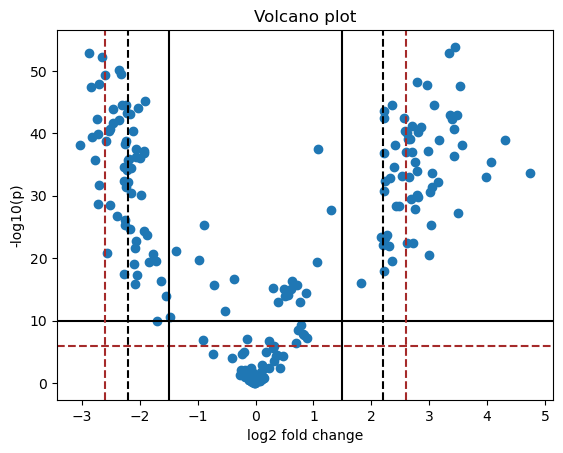

In [246]:
plt.figure()
plt.scatter(fc, logp)
plt.title("Volcano plot")
plt.axhline(y=10, c='k')
plt.axhline(y=6, c='brown', linestyle='--')

plt.axvline(x=1.5, c='k')
plt.axvline(x=-1.5, c='k')
plt.axvline(x=2.2, c='k', linestyle='--')
plt.axvline(x=-2.2, c='k', linestyle='--')
plt.axvline(x=2.6, c='brown', linestyle='--')
plt.axvline(x=-2.6, c='brown', linestyle='--')
plt.xlabel("log2 fold change")
plt.ylabel("-log10(p)")
plt.show()

In [247]:
smallest_set = np.asarray(most_sig_fewest)
smaller_set = np.asarray(most_sig_fewer)
most_sig_set = np.asarray(most_sig)
all_sig_set = np.asarray(all_sig)

In [248]:
all_sig_set.shape

(162,)

In [249]:
most_sig_set.shape

(142,)

In [250]:
smaller_set.shape

(113,)

In [251]:
smallest_set.shape

(58,)

In [252]:
# save selected genes
with open("data/most_sig_set", "wb") as fp:   #Pickling
    pickle.dump(most_sig_set, fp)

In [253]:
# save selected genes
with open("data/smaller_set", "wb") as fp:   #Pickling
    pickle.dump(smaller_set, fp)

In [254]:
# save selected genes
with open("data/smallest_set", "wb") as fp:   #Pickling
    pickle.dump(smallest_set, fp)

In [255]:
# save selected genes
with open("data/all_sig_set", "wb") as fp:   #Pickling
    pickle.dump(all_sig_set, fp)

## Hierarchical clustering heatmap 
### 119 most differentially expressed genes between CD and control patients - stat significant at 1% level
### Includes controls, CD no deep ulcer, CD deep ulcer

In [256]:
all_CD_cols = np.array(select_hundred.columns)
i = 0
for i in range(len(all_CD_cols)):
    print(i,":",all_CD_cols[i])

0 : 1_CD_plain
1 : 2_CD_plain
2 : 3_CD_plain
3 : 4_CD_plain
4 : 5_CD_plain
5 : 6_CD_deep_ulcer
6 : 7_CD_plain
7 : 8_CD_plain
8 : 9_CD_plain
9 : 12_CD_plain
10 : 13_CD_plain
11 : 15_CD_plain
12 : 16_CD_plain
13 : 17_CD_deep_ulcer
14 : 20_control
15 : 21_CD_deep_ulcer
16 : 22_CD_deep_ulcer
17 : 23_CD_deep_ulcer
18 : 24_CD_plain
19 : 25_CD_plain
20 : 27_CD_deep_ulcer
21 : 29_CD_plain
22 : 30_CD_plain
23 : 32_CD_plain
24 : 37_CD_deep_ulcer
25 : 40_CD_plain
26 : 43_CD_plain
27 : 45_CD_plain
28 : 46_CD_deep_ulcer
29 : 47_CD_plain
30 : 48_CD_deep_ulcer
31 : 49_CD_deep_ulcer
32 : 50_CD_deep_ulcer
33 : 51_CD_deep_ulcer
34 : 52_CD_plain
35 : 53_CD_plain
36 : 56_CD_plain
37 : 57_CD_plain
38 : 58_CD_plain
39 : 59_CD_deep_ulcer
40 : 60_CD_plain
41 : 61_CD_plain
42 : 62_CD_deep_ulcer
43 : 63_CD_deep_ulcer
44 : 66_CD_plain
45 : 68_CD_plain
46 : 69_CD_deep_ulcer
47 : 70_CD_deep_ulcer
48 : 71_CD_plain
49 : 73_CD_plain
50 : 74_CD_plain
51 : 75_CD_deep_ulcer
52 : 91_CD_plain
53 : 93_CD_deep_ulcer
54 : 94

In [257]:
sig_genes_df = select_hundred.copy()
sig_genes_df

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
AADAC,-0.881250,-8.3859,-3.476500,0.47600,-6.860900,-3.757300,-4.744800,-0.044202,-2.50650,0.006241,...,-1.031600,1.16230,0.199200,0.23903,1.361500,-0.934720,-0.248440,-5.228900,-0.680680,-1.489900
APOA1,-3.046500,-9.3617,-2.636300,0.93493,-6.478400,-5.871500,-9.417700,-0.653090,-4.26860,-0.835050,...,-0.569040,0.74486,0.200140,-0.15932,1.051600,-1.207500,-1.068500,-7.455900,0.396090,-2.945300
APOA4,-0.918130,-7.1696,-2.648600,0.19887,-7.481800,-3.041400,-7.560500,-0.947140,-1.66230,-0.893450,...,-0.829470,0.54624,0.532340,-0.29898,0.265380,-0.071699,-1.206200,-6.297200,0.225200,-1.919800
APOB,-1.312800,-7.4158,-2.541200,1.91080,-7.065600,-3.729600,-6.837700,0.335400,-3.11090,-0.016976,...,-0.000025,1.02530,0.417150,0.14618,1.016900,0.075990,-0.442670,-5.480500,-0.043606,-2.899300
APOC3,-1.277500,-8.0880,-2.169100,0.80647,-7.229600,-3.867300,-8.254200,-0.466340,-1.60880,-0.302970,...,-0.581970,0.59072,0.047763,-0.39229,0.535160,-0.996560,-1.302900,-7.370300,0.002768,-1.891600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C16orf78,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.318080,0.000000,0.000000,0.000000
C5orf17,0.086807,0.0000,0.000000,0.13729,0.312130,0.000000,0.000000,5.470200,0.00000,0.000000,...,1.930300,0.00000,1.135300,0.00000,0.000000,2.197200,1.903000,2.681100,1.128700,2.535500
LOC100132831,0.013324,1.0355,-0.073483,2.06380,-0.073483,-0.073483,0.284390,1.419200,1.61160,0.222560,...,0.856840,1.88610,0.798830,1.26050,-0.073483,0.618750,-0.073483,1.625600,0.820750,-0.073483


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


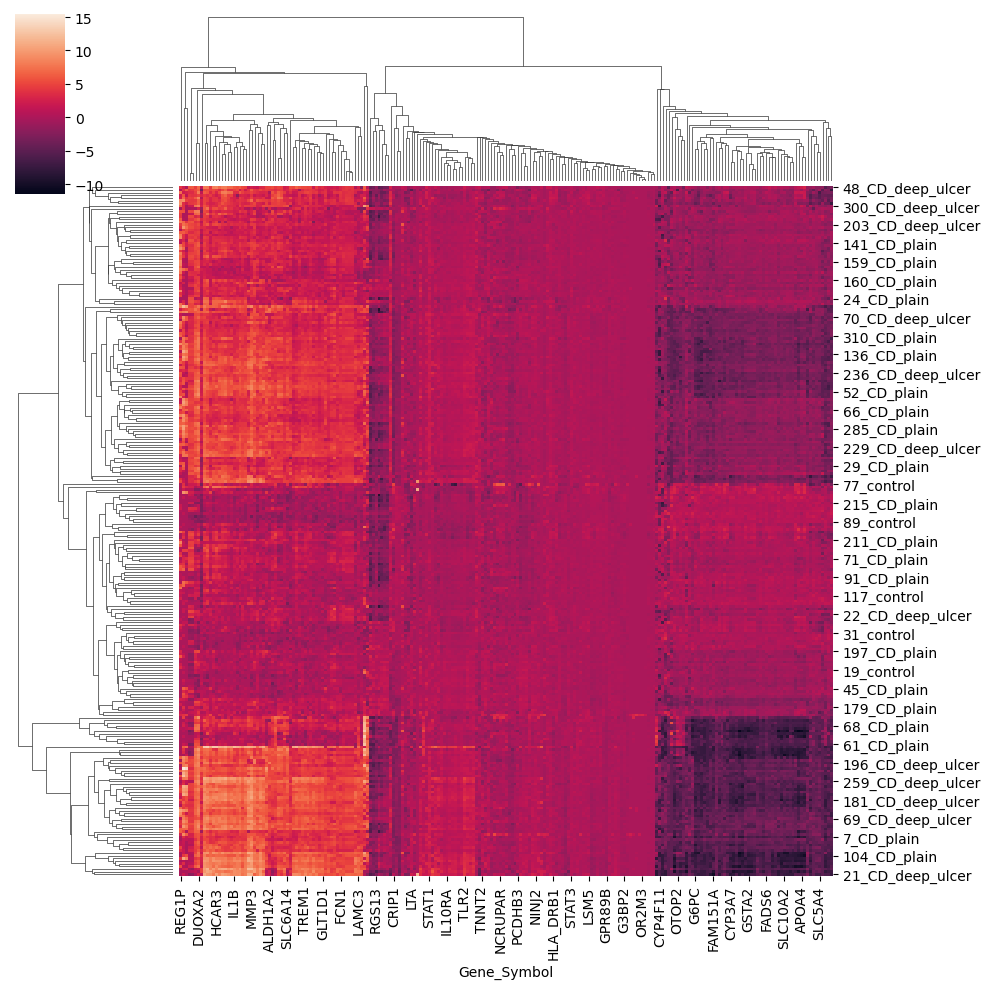

In [258]:
# sns.clustermap(top_genes.T)
# sns.clustermap(top_genes.iloc[:,np.r_[143:168, 221:228]].T)
sns.clustermap(sig_genes_df.T)
# sns.clustermap(select_hundred.iloc[:20,np.r_[143:168, 221:228]].T)

In [259]:
sig_genes_df.isnull().values.any()

False

In [260]:
sig_genes_df.to_csv('data/cd_df.csv')

### Top X most differentially expressed genes between CD and control patients

In [261]:
top_genes_df = select_hundred.loc[smallest_set]
top_genes_df

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
APOA1,-3.046500,-9.36170,-2.63630,0.934930,-6.47840,-5.87150,-9.41770,-0.653090,-4.268600,-0.835050,...,-0.569040,0.744860,0.200140,-0.159320,1.051600,-1.207500,-1.068500,-7.45590,0.39609,-2.94530
AQP9,6.321500,9.67970,7.92790,0.222290,9.27050,7.43260,5.41190,0.882510,5.878600,2.118000,...,3.407600,-1.915000,2.679800,1.418900,-1.915000,4.896700,0.725000,9.03570,5.92230,7.62510
C6,-3.505600,-5.17740,-4.07780,-0.520260,-5.17740,-3.86590,-4.20280,-1.602200,-5.177400,-3.144300,...,0.049430,0.704030,2.657300,0.328110,-1.710900,1.880000,-2.274300,-3.91130,-0.31168,-3.30480
CEACAM7,5.427900,-0.42569,7.18170,-2.397400,0.88511,5.01990,3.83070,0.914890,2.745300,-0.823620,...,1.395600,-0.897070,0.922570,0.301730,0.401220,1.257100,-2.216600,1.55580,2.62370,3.64970
CHI3L1,3.305800,8.04170,5.55740,-2.621000,7.74180,3.38880,6.20020,1.108200,3.804900,2.709200,...,1.132300,-2.661200,-0.535460,-0.651740,-2.108600,-0.303530,1.067600,7.39930,1.93600,6.41240
CNTFR,-3.052600,-7.91970,-4.01280,0.148220,-7.60760,-4.43830,-7.91970,-0.511510,-5.012200,-0.646370,...,-2.434800,1.334700,0.126700,0.324420,0.144790,-2.127900,-1.334800,-5.91660,-3.09050,-4.14020
CSF3,0.000000,9.47620,6.51370,0.137290,8.74400,1.31140,5.92270,0.000000,4.187600,0.000000,...,2.252300,0.000000,0.550380,0.000000,0.000000,0.000000,0.000000,9.07140,1.54370,8.01400
CYP3A4,-3.879200,-9.60300,-2.88130,0.733760,-6.98370,-3.32100,-7.70960,-0.532380,-3.597000,-0.411650,...,0.399810,0.371250,0.115900,-0.007023,0.955210,0.334690,-1.046500,-6.73860,-0.93721,-2.14040
FCGR1A,2.961200,5.01790,5.15060,-0.828660,4.77590,3.51350,4.50970,1.518200,3.797800,2.477700,...,1.796800,-1.550600,-0.120800,-1.078500,-0.893410,1.389700,1.279000,5.21380,3.14160,3.55260


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


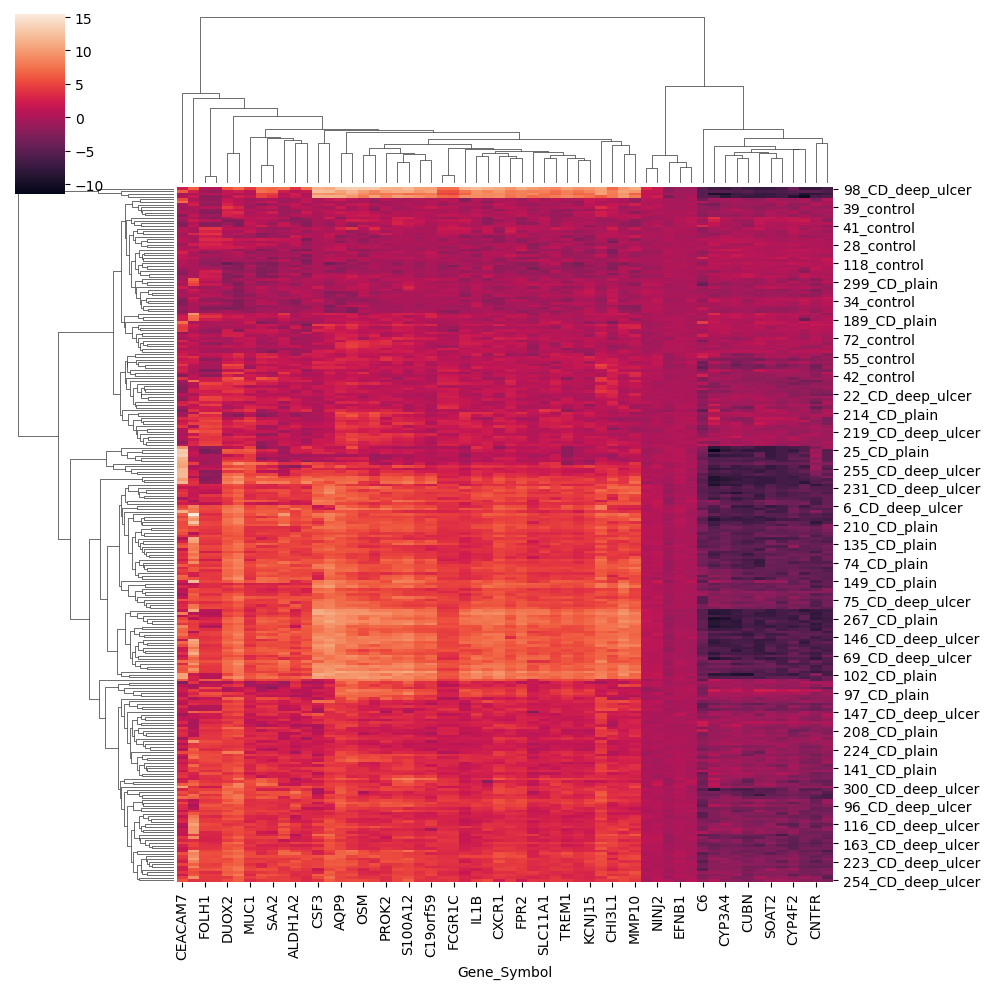

In [262]:
sns.clustermap(top_genes_df.T)

### Example: expression of top X genes in random sample of control and CD patients

In [263]:
# random sample of patients
np.random.seed(123)
rand_pids = np.random.randint(low=0, high=260, size=30, dtype=int)

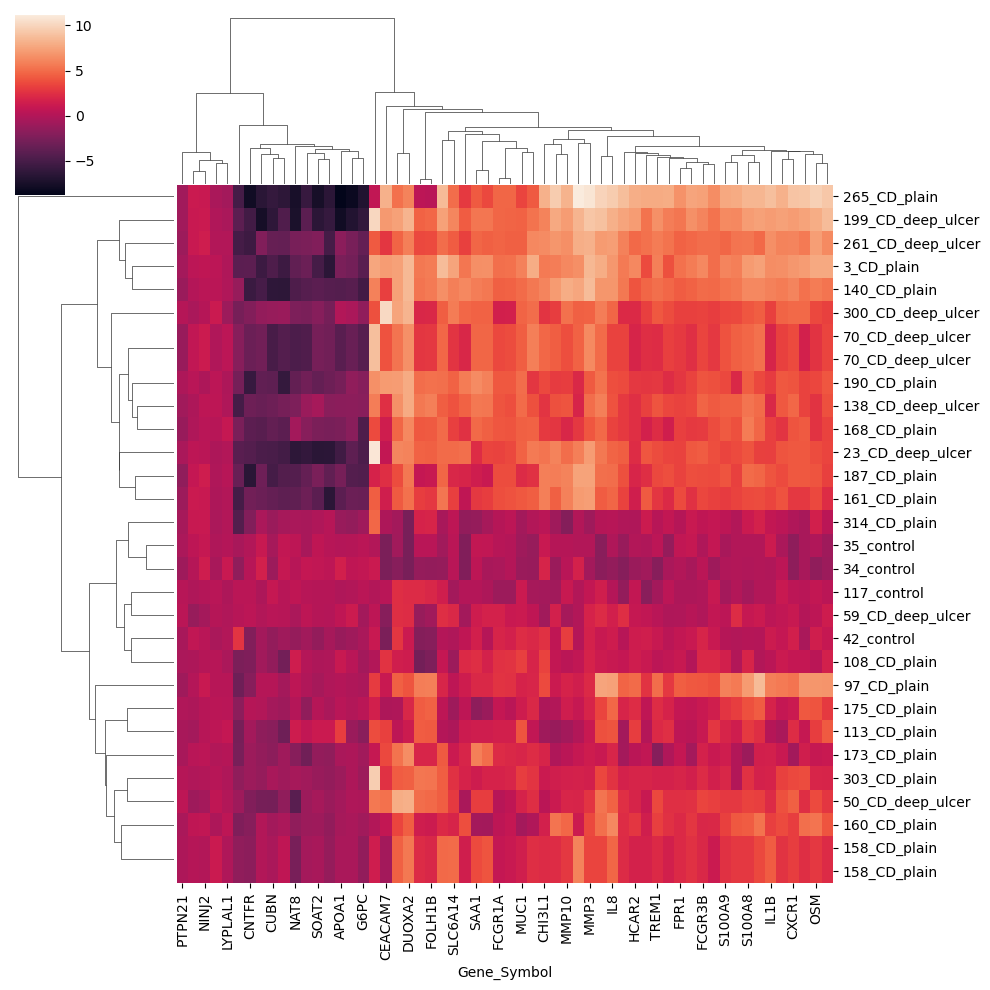

In [264]:
# sns.clustermap(top_genes_df.iloc[:,np.r_[143:168, 221:228]].T)
sns.clustermap(top_genes_df.iloc[:,np.r_[rand_pids]].T)